In [197]:
import os
import pandas as pd
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = '../../Data'

csv_path_train = os.path.join(DATA_PATH, 'split_train.csv')
csv_path_val = os.path.join(DATA_PATH, 'split_val.csv')
csv_path_test = os.path.join(DATA_PATH, 'split_test.csv')

image_path = os.path.join(DATA_PATH, 'images')

# text_data_column = 'Text Normalized'
text_data_column = 'Text Transcription'

def read_data_from_csv(path_name):
	df = pd.read_csv(path_name, usecols=['file_name',text_data_column, 'misogynous', 'shaming','stereotype','objectification','violence'], sep='\t')
	path = image_path+'/'
	df['image_path'] = path + df['file_name']

	return df

## Reading data
train_df = read_data_from_csv(csv_path_train)
val_df = read_data_from_csv(csv_path_val)
test_df = read_data_from_csv(csv_path_test)


X_train = train_df[text_data_column]
X_test = test_df[text_data_column]
print(X_train.shape)
print(X_test.shape)

print(train_df.shape)
# target_names = ['non-misogynistic', 'misogynistic']

(7000,)
(1000,)
(7000, 8)


In [149]:
train_df.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Normalized,image_path
0,5999.jpg,0,0,0,0,0,oh you re not gay name every women,../../Data/images/5999.jpg
1,4334.jpg,0,0,0,0,0,when she buys a new toy heinerle knatterwalze ...,../../Data/images/4334.jpg
2,1294.jpg,0,0,0,0,0,cyberbullying here s one quick solution memesh...,../../Data/images/1294.jpg
3,4391.jpg,1,0,0,1,0,girlfriend catches you jerking off say thats w...,../../Data/images/4391.jpg
4,4166.jpg,1,0,0,0,1,chris brown s greatest hits memecenter com mem...,../../Data/images/4166.jpg


In [150]:
categories = ['misogynous', 'shaming','stereotype','objectification','violence']
counts = []
for i in categories:
    counts.append((i, train_df[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_memes'])
df_stats

,category,number_of_memes
0,misogynous,3488
1,shaming,909
2,stereotype,1950
3,objectification,1538
4,violence,661


In [184]:
categories = ['misogynous', 'shaming','stereotype','objectification','violence']
counts = []
for i in categories:
    counts.append((i, test_df[i].sum()))
df_stats_test = pd.DataFrame(counts, columns=['category', 'number_of_memes'])
df_stats_test

counts = []
for i in categories:
    counts.append((i, train_df[i].sum()))
df_stats_train = pd.DataFrame(counts, columns=['category', 'number_of_memes'])
df_stats_train

counts = []
for i in categories:
    counts.append((i, val_df[i].sum()))
df_stats_val = pd.DataFrame(counts, columns=['category', 'number_of_memes'])
df_stats_val

,category,number_of_memes
0,misogynous,1029
1,shaming,256
2,stereotype,582
3,objectification,457
4,violence,194


In [173]:
total = 0
for a,b in counts[1:]:
    total += b
total

692

In [174]:
# sub_tdf = train_df[['misogynous', 'shaming','stereotype','objectification','violence']]
# pd.DataFrame(sub_tdf.sum(axis=0),)

Text(0.5,0,'category')

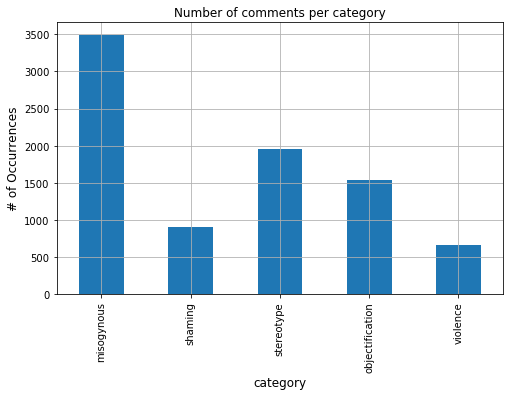

In [179]:
df_stats_train.plot(x='category', y='number_of_memes', kind='bar', legend=False, grid=True, figsize=(8, 5))
# df_stats_test.plot(x='category', y='number_of_memes', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of Memes per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

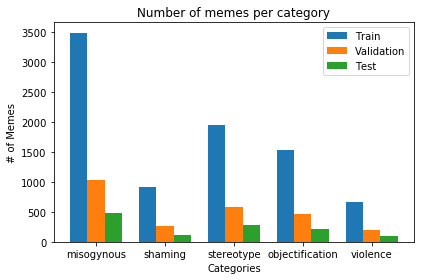

In [200]:
labels = categories
train_means = df_stats_train['number_of_memes']
test_means = df_stats_test['number_of_memes']
val_means = df_stats_val['number_of_memes']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, men_means, width, label='Train')
rects2 = ax.bar(x , val_means, width, label='Validation')
rects2 = ax.bar(x + width, test_means, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of Memes')
ax.set_xlabel('Categories')
ax.set_title('Number of memes per category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.savefig('sample.pdf')

/Users/srnangi/miniconda3/envs/cs229/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


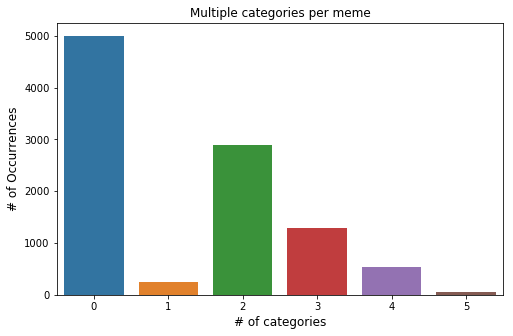

In [202]:
csv_path_test = os.path.join(DATA_PATH, 'training.csv')
total_df = read_data_from_csv(csv_path_test)
sub_tdf = total_df[['misogynous', 'shaming','stereotype','objectification','violence']]
rowsums = sub_tdf.sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per meme")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

plt.savefig("img_category.pdf")

In [204]:
x

0    4996
2    2889
3    1288
4     530
1     252
5      45
dtype: int64

In [206]:
2889 + 1288 + 530


4707

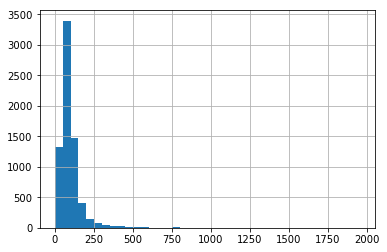

In [156]:
## Length distribution
lens = train_df[text_data_column].str.len()
lens.hist(bins = np.arange(0,2000,50))

In [158]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

In [162]:
prediction_labels = []
gt_labels = []
accuracy = []
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train_df[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
#     print(type(prediction))
    prediction_labels.append(prediction)
    gt_labels.append(test_df[category])
    
    acc_score = accuracy_score(test_df[category], prediction)
    accuracy.append(acc_score)
    print('Test accuracy is {}'.format(acc_score))

... Processing misogynous
Test accuracy is 0.802
... Processing shaming
Test accuracy is 0.891
... Processing stereotype
Test accuracy is 0.744
... Processing objectification
Test accuracy is 0.795
... Processing violence
Test accuracy is 0.902


In [163]:
pred_format = np.array(prediction_labels).T
gt_format = np.array(gt_labels).T

In [164]:
print(classification_report(gt_format, pred_format, target_names=categories, digits=4))
print("Accuracy : {}".format(np.mean(accuracy)))

                 precision    recall  f1-score   support

     misogynous     0.7778    0.8261    0.8012       483
        shaming     0.0000    0.0000    0.0000       109
     stereotype     0.8929    0.0899    0.1634       278
objectification     1.0000    0.0097    0.0191       207
       violence     0.0000    0.0000    0.0000        98

      micro avg     0.7845    0.3626    0.4959      1175
      macro avg     0.5341    0.1851    0.1967      1175
   weighted avg     0.7071    0.3626    0.3714      1175
    samples avg     0.3975    0.1900    0.2493      1175

Accuracy : 0.8268000000000001


/Users/srnangi/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/srnangi/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/srnangi/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [165]:
accuracy_score(gt_format, pred_format)

0.436

In [166]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
prediction_labels = []
gt_labels = []
accuracy =[]

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train_df[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    prediction_labels.append(prediction)
    gt_labels.append(test_df[category])
    
    
    acc_score = accuracy_score(test_df[category], prediction)
    accuracy.append(acc_score)
    print('Test accuracy is {}'.format(acc_score))

... Processing misogynous
Test accuracy is 0.793
... Processing shaming
Test accuracy is 0.892
... Processing stereotype
Test accuracy is 0.776
... Processing objectification
Test accuracy is 0.816
... Processing violence
Test accuracy is 0.912


In [167]:
pred_format = np.array(prediction_labels).T
gt_format = np.array(gt_labels).T
print(classification_report(gt_format, pred_format, target_names=categories, digits=4))
print("Accuracy : {}".format(np.mean(accuracy)))

                 precision    recall  f1-score   support

     misogynous     0.7805    0.7950    0.7877       483
        shaming     0.5085    0.2752    0.3571       109
     stereotype     0.6205    0.5000    0.5538       278
objectification     0.5839    0.3865    0.4651       207
       violence     0.6667    0.2041    0.3125        98

      micro avg     0.6932    0.5557    0.6169      1175
      macro avg     0.6320    0.4322    0.4952      1175
   weighted avg     0.6733    0.5557    0.5959      1175
    samples avg     0.3492    0.2813    0.2971      1175

Accuracy : 0.8378


/Users/srnangi/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/srnangi/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
accuracy_score(gt_format, pred_format)

0.51

In [169]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
prediction_labels = []
gt_labels = []
accuracy = []
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train_df[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    prediction_labels.append(prediction)
    gt_labels.append(test_df[category])
    
    acc_score = accuracy_score(test_df[category], prediction)
    accuracy.append(acc_score)
    print('Test accuracy is {}'.format(acc_score))

... Processing misogynous
Test accuracy is 0.801
... Processing shaming
Test accuracy is 0.9
... Processing stereotype
Test accuracy is 0.793
... Processing objectification
Test accuracy is 0.82
... Processing violence
Test accuracy is 0.907


In [170]:
pred_format = np.array(prediction_labels).T
gt_format = np.array(gt_labels).T
print(classification_report(gt_format, pred_format, target_names=categories, digits=4))
print("Accuracy : {}".format(np.mean(accuracy)))

                 precision    recall  f1-score   support

     misogynous     0.8047    0.7764    0.7903       483
        shaming     0.8000    0.1101    0.1935       109
     stereotype     0.7795    0.3561    0.4889       278
objectification     0.7213    0.2126    0.3284       207
       violence     1.0000    0.0510    0.0971        98

      micro avg     0.7938    0.4553    0.5787      1175
      macro avg     0.8211    0.3012    0.3796      1175
   weighted avg     0.7999    0.4553    0.5244      1175
    samples avg     0.3575    0.2336    0.2694      1175

Accuracy : 0.8442000000000001


/Users/srnangi/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/srnangi/miniconda3/envs/cs229/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
accuracy_score(gt_format, pred_format)

0.517